# Q5: Analysis (20 points)
By now you should know how to train networks from scratch or using from pre-trained models. You should also understand the relative performance in either scenarios. Needless to say, the performance of these models is stronger than previous non-deep architectures used until 2012. However, final performance is not the only metric we care about. It is important to get some intuition of what these models are really learning. Lets try some standard techniques.


**FEEL FREE TO WRITE UTIL CODE IN ANOTHER FILE AND IMPORT IN THIS NOTEBOOK FOR EASE OF READABILITY**

Written in utils_q5.py

caffenet.py

## 5.1 Nearest Neighbors (7 pts)
Pick 3 images from PASCAL test set from different classes, and compute 4 nearest neighbors over the entire test set for each of them. You should compare the following feature representations to find the nearest neighbors:
1. The features before the final fc layer from the ResNet (finetuned from ImageNet). It is the features right before the final class label output.
2. pool5 features from the CaffeNet (trained from scratch)

You may use the [this nearest neighbor function](https://scikit-learn.org/stable/modules/neighbors.html).
Plot the raw images of the ones you picked and their nearest neighbors.

In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
import numpy as np
from utils import ARGS
from utils import get_data_loader
from simple_cnn import SimpleCNN, get_fc
from voc_dataset import VOCDataset
from sklearn.neighbors import NearestNeighbors

# 1. The features before the final fc layer from the ResNet (finetuned from ImageNet)

In [21]:
class PretrainedResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.resnet18(pretrained=True)
        self.model = nn.Sequential(*list(self.model.children())[:-1])
        self.flat_dim = 512
        self.fc = nn.Linear(512, 20)
    
    def forward(self, x):
        N = x.size(0)
        x = self.model(x)
#         flat_x = x.view(N, self.flat_dim)
#         out = self.fc(flat_x)
        return x

In [22]:
test_loader = get_data_loader('voc', train=False, batch_size=ARGS.test_batch_size, split='test', inp_size=ARGS.inp_size)
device =  torch.device("cuda" if ARGS.use_cuda else "cpu")
model = PretrainedResNet().to(device)

# resnet = models.resnet18(pretrained=True)
# resnet = nn.Sequential(*list(resnet.children())[:-1])

# model = resnet.to(device)
model_name = 'ResNet_Pretrained_True'
filename = 'checkpoint-{}-epoch{}.pth'.format(
        model_name, 10)
model.load_state_dict(torch.load(filename))
model.eval()

pred = []
all_data = []
for data, _, _ in test_loader:
    data = data.to(device)
    output = model(data)
    pred.append(output.detach().cpu().numpy())
    all_data.append(data.detach().cpu().numpy())
pred = np.concatenate(pred)
data = np.concatenate(all_data)
pred = pred[:,:,0,0] ##squeeze dimensions

In [23]:
# ResNet
near_n = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(pred)
_, indices1 = near_n.kneighbors(pred[15,:].reshape(1,-1)) #cat
_, indices2 = near_n.kneighbors(pred[96,:].reshape(1,-1)) #bus
_, indices3 = near_n.kneighbors(pred[301,:].reshape(1,-1)) #car

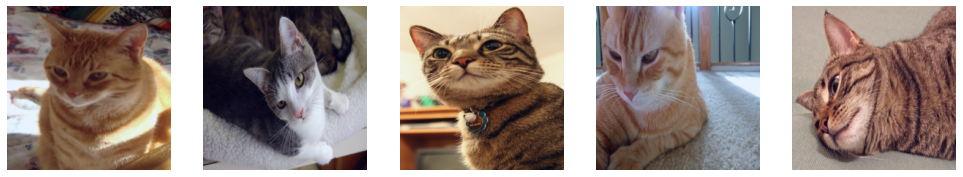

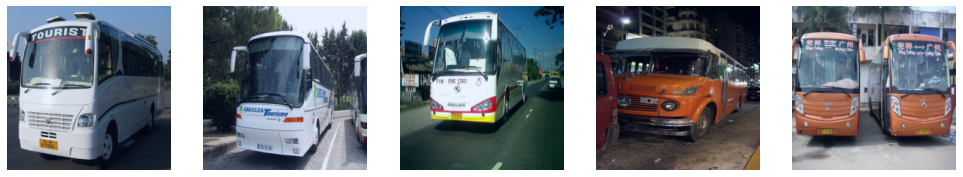

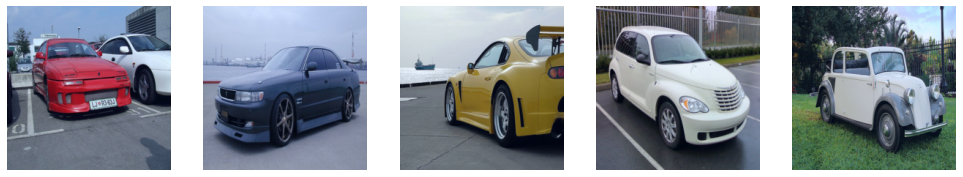

In [26]:
fig1, ax1 = plt.subplots(1,5)
fig1.set_figwidth(17)

for i, index in enumerate(indices1[0]):
    image = data[index, :]
    image = np.moveaxis(image, 0, -1)
    image = (image - image.min())/(image.max() - image.min())
    ax1[i].axis("off")
    ax1[i].imshow(image)
plt.show()

fig1, ax1 = plt.subplots(1,5)
fig1.set_figwidth(17)

for i, index in enumerate(indices2[0]):
    image = data[index, :]
    image = np.moveaxis(image, 0, -1)
    image = (image - image.min())/(image.max() - image.min())
    ax1[i].axis("off")
    ax1[i].imshow(image)
plt.show()

fig1, ax1 = plt.subplots(1,5)
fig1.set_figwidth(17)

for i, index in enumerate(indices3[0]):
    image = data[index, :]
    image = np.moveaxis(image, 0, -1)
    image = (image - image.min())/(image.max() - image.min())    
    ax1[i].axis("off")
    ax1[i].imshow(image)
plt.show()


# 2. pool5 features from the CaffeNet (trained from scratch)


In [27]:
from utils_q5 import CaffeNetPool5

# Load all the test images. Pick 3 indices.
test_loader = get_data_loader('voc', train=False, batch_size=ARGS.test_batch_size, split='test', inp_size=ARGS.inp_size)
device =  torch.device("cuda" if ARGS.use_cuda else "cpu")
model = CaffeNetPool5().to(device)
model_name = 'CaffeNet'
filename = 'checkpoint-{}-epoch{}.pth'.format(
        model_name, 50)
model.load_state_dict(torch.load(filename))
model.eval()

pred = []
all_data = []
for data, _, _ in test_loader:
    data = data.to(device)
    output = model(data)
    pred.append(output.detach().cpu().numpy())
    all_data.append(data.detach().cpu().numpy())
pred = np.concatenate(pred)
data = np.concatenate(all_data)

# Calculate the features for all the test images.

# Fine the nearest neighbors for the 3 images you picked.

# Plot the images and their neighbors.

In [28]:
# CaffeNet()
pred = pred[:,:,0,0] ##squeeze dimensions
near_n = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(pred)
_, indices1 = near_n.kneighbors(pred[15,:].reshape(1,-1)) #cat
_, indices2 = near_n.kneighbors(pred[96,:].reshape(1,-1)) #bus
_, indices3 = near_n.kneighbors(pred[301,:].reshape(1,-1)) #car
# _, indices4 = near_n.kneighbors(pred[400,:].reshape(1,-1)) #horse
# _, indices5 = near_n.kneighbors(pred[689,:].reshape(1,-1)) #men and bikes

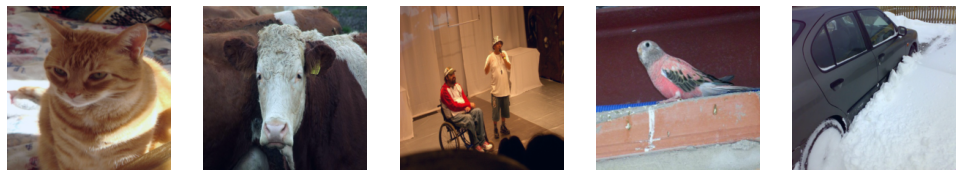

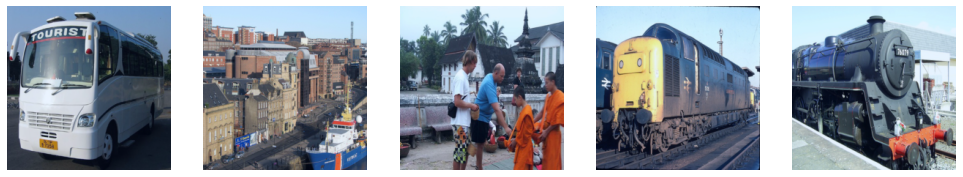

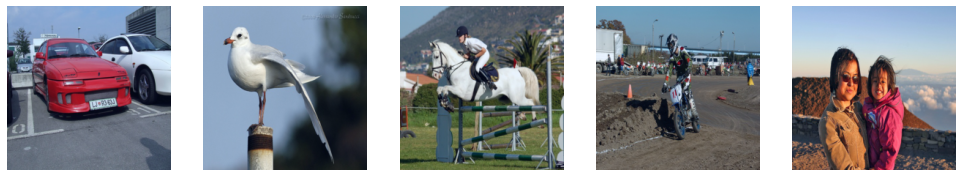

In [29]:
fig1, ax1 = plt.subplots(1,5)
fig1.set_figwidth(17)

for i, index in enumerate(indices1[0]):
    image = data[index, :]
    image = np.moveaxis(image, 0, -1)
    image = (image - image.min())/(image.max() - image.min())
    ax1[i].axis("off")
    ax1[i].imshow(image)
plt.show()

fig1, ax1 = plt.subplots(1,5)
fig1.set_figwidth(17)

for i, index in enumerate(indices2[0]):
    image = data[index, :]
    image = np.moveaxis(image, 0, -1)
    image = (image - image.min())/(image.max() - image.min())
    ax1[i].axis("off")
    ax1[i].imshow(image)
plt.show()

fig1, ax1 = plt.subplots(1,5)
fig1.set_figwidth(17)

for i, index in enumerate(indices3[0]):
    image = data[index, :]
    image = np.moveaxis(image, 0, -1)
    image = (image - image.min())/(image.max() - image.min())
    ax1[i].axis("off")
    ax1[i].imshow(image)
plt.show()


## 5.2 t-SNE visualization of intermediate features (7pts)
We can also visualize how the feature representations specialize for different classes. Take 1000 random images from the test set of PASCAL, and extract caffenet (scratch) fc7 features from those images. Compute a 2D [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) projection of the features, and plot them with each feature color coded by the GT class of the corresponding image. If multiple objects are active in that image, compute the color as the ”mean” color of the different classes active in that image. Legend the graph with the colors for each object class.

In [30]:
from sklearn.manifold import TSNE
import seaborn as sns

In [48]:
class CaffeNetFC7(nn.Module):
    def __init__(self, num_classes=20, inp_size=224, c_dim=3):
        super().__init__()
        self.num_classes = num_classes
#         self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv1 = nn.Conv2d(3, 96, 11, stride=4, padding=0)
        self.conv2 = nn.Conv2d(96, 256, 5, stride=1, padding=2)
        self.conv3 = nn.Conv2d(256, 384, 3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(384, 384, 3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(384, 256, 3, stride=1, padding=1)
        
        self.nonlinear = nn.ReLU()
        
        self.pool = nn.MaxPool2d(3, 2)
        
        self.dropout = nn.Dropout(p=0.5)
        
        self.flat_dim = (int)(256*(5)*(5))
        
        self.fc1 = nn.Sequential(*get_fc(self.flat_dim, 4096, 'relu'))
        self.fc2 = nn.Sequential(*get_fc(4096,  4096, 'relu'))
        self.fc3 = nn.Sequential(*get_fc(4096, 20, 'none'))
        
    def forward(self, x):
        N = x.size(0)
        x = self.conv1(x)
        x = self.nonlinear(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = self.nonlinear(x)
        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.nonlinear(x)
        
        x = self.conv4(x)
        x = self.nonlinear(x)
        
        x = self.conv5(x)
        x = self.nonlinear(x)
        x = self.pool(x)
        
        flat_x = x.view(N, self.flat_dim)
        out = self.fc1(flat_x)
        out = self.nonlinear(out)
        out = self.dropout(out)
        
        out = self.fc2(out)
#         out = self.nonlinear(out)
#         out = self.dropout(out)
        
#         out = self.fc3(out)
        
        return out

In [50]:
test_loader = get_data_loader('voc', train=False, batch_size=ARGS.test_batch_size, split='test', inp_size=ARGS.inp_size)
device =  torch.device("cuda" if ARGS.use_cuda else "cpu")
model = CaffeNetFC7().to(device)
model_name = 'CaffeNet'
filename = 'checkpoint-{}-epoch{}.pth'.format(
        model_name, 50)
model.load_state_dict(torch.load(filename))
model.eval()

pred = []
all_data = []
gt = []
for data, target, _ in test_loader:
    data = data.to(device)
    target = target.to(device)
    
    output = model(data)
    pred.append(output.detach().cpu().numpy())
    all_data.append(data.detach().cpu().numpy())
    gt.append(target.detach().cpu().numpy())
pred = np.concatenate(pred)
data = np.concatenate(all_data)
gt = np.concatenate(gt)

In [51]:
no_imgs = data.shape[0]
random_index = np.random.choice(no_imgs, size=1000, replace=False)
pred_1000 = pred[random_index, :]
data_1000 = data[random_index, :, :, :]
gt_1000 = gt[random_index, :]

In [52]:
# plot t-SNE here
tsne_results = TSNE(n_components=2).fit_transform(pred_1000)

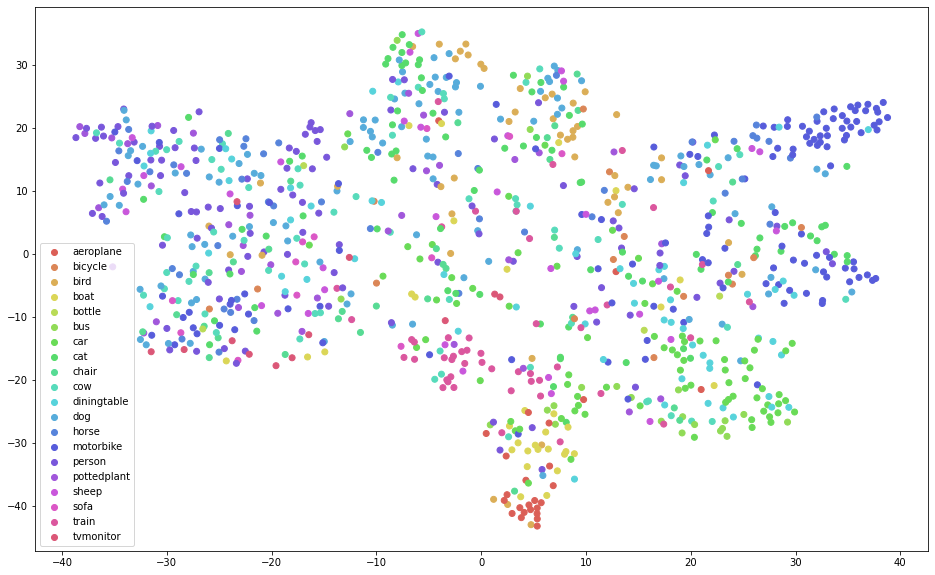

In [53]:
CLASS_NAMES = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
               'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
               'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
palette = np.array(sns.color_palette("hls", 20))

label = {}
for i in range(20):
    label[str(palette[i])] = CLASS_NAMES[i]

t = np.argmax(gt_1000, axis =1)

color = np.zeros(1000)
for i in range(1000): 
    color[i] = int(np.mean(np.where(gt_1000[i] == 1)))
     

fig = plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c = palette[color.astype(int)])
for i in range(20):
    plt.scatter([], [], color=palette[i], label = label[str(palette[i])] )
plt.legend()
# print(gt_1000[6])

## 5.3 Are some classes harder? (6pts)
Show the per-class performance of your caffenet (scratch) and ResNet (finetuned) models. This is an open-ended question and you may use any performance metric that makes sense. Try to explain, by observing examples from the dataset, why some classes are harder or easier than the others (consider the easiest and hardest class). Do some classes see large gains due to pre-training? Can you explain why that might happen?

**ANSWER**

The performance metric I have chosen to use for showing the per-class performance of caffenet(scratch) and ResNet(finetuned) is the Average Precision for each class (AP). For caffenet, the easiest class based on the AP values seems to be classiying a Person, and the hardest being a cow then a bottle. For Resnet, the easiest class is classifying an aeroplane, the next being a person, and the hardest is classifying a bottle. The bottle is very difficult to classify, this makes sense as there are many different types of bottles, of different sizes, shapes, and mainly transparencies. With glass bottles, it is very difficult for the network could misclassify any similar glass textured surface as bottles. With the cow, we could have many different colors, say a spotted black and white cow, or a brown cow. This could mean the network classifies the cow as a dog.

The classes that see the largest gains due to pre-training are the cow, followed by the sheep, bottle and dog. This is because of a good initialization of the weights from the pretrained ResNet model that has been trained on the the ImageNet dataset. For the particular classes mentioned, it is possible that training on the ImageNet generates weights, that look for features corresponding better to the classes above. We can see below based on the features from the caffenet network that the nearnest neighbors to the sheep can also be classified as a cow.

In [62]:
from caffenet import CaffeNet

In [69]:
class PretrainedResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.resnet18(pretrained=True)
        self.model = nn.Sequential(*list(self.model.children())[:-1])
        self.flat_dim = 512
        self.fc = nn.Linear(512, 20)
    
    def forward(self, x):
        N = x.size(0)
        x = self.model(x)
        flat_x = x.view(N, self.flat_dim)
        out = self.fc(flat_x)
        return out

In [70]:
model_caffenet = CaffeNet().to(device)
model_resnet = PretrainedResNet().to(device)

model_name = 'CaffeNet'
filename = 'checkpoint-{}-epoch{}.pth'.format(
        model_name, 50)
model_caffenet.load_state_dict(torch.load(filename))
model_caffenet.eval()

model_name = 'ResNet_Pretrained_True'
filename = 'checkpoint-{}-epoch{}.pth'.format(
        model_name, 10)
model_resnet.load_state_dict(torch.load(filename))
model_resnet.eval()

from utils import eval_dataset_map

test_loader = get_data_loader('voc', train=False, batch_size=ARGS.test_batch_size, split='test', inp_size=ARGS.inp_size)
ap_caffenet, _ = eval_dataset_map(model_caffenet, device, test_loader)
ap_resnet, _ = eval_dataset_map(model_resnet, device, test_loader)

In [192]:
pred = []
all_data = []
for data, _, _ in test_loader:
    data = data.to(device)
    output = model_caffenet(data)
    pred.append(output.detach().cpu().numpy())
    all_data.append(data.detach().cpu().numpy())
pred = np.concatenate(pred)
data = np.concatenate(all_data)

near_n = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(pred)


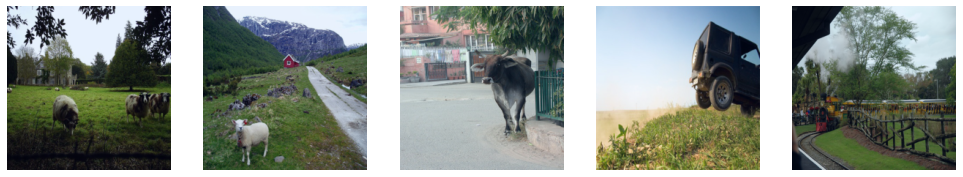

In [191]:
_, indices1 = near_n.kneighbors(pred[498,:].reshape(1,-1)) #bottle
# _, indices2 = near_n.kneighbors(pred[96,:].reshape(1,-1)) #bus

fig1, ax1 = plt.subplots(1,5)
fig1.set_figwidth(17)

for i, index in enumerate(indices1[0]):
    image = data[index, :]
    image = np.moveaxis(image, 0, -1)
    image = (image - image.min())/(image.max() - image.min())
    ax1[i].axis("off")
    ax1[i].imshow(image)
plt.show()

In [87]:
#AP values for CaffeNet
for i in range(len(ap_caffenet)):
    print("AP value for " + CLASS_NAMES[i] + " on CaffeNet = " + str(ap_caffenet[i]) + " vs." + " Pretrained ResNet = " + str(ap_resnet[i]))
    print()

AP value for aeroplane on CaffeNet = 0.6153261006156242 vs. Pretrained ResNet = 0.9655915371883028

AP value for bicycle on CaffeNet = 0.4471787163900634 vs. Pretrained ResNet = 0.9114481755337778

AP value for bird on CaffeNet = 0.3588267872229093 vs. Pretrained ResNet = 0.9334097634591865

AP value for boat on CaffeNet = 0.462699025647958 vs. Pretrained ResNet = 0.9053278213480229

AP value for bottle on CaffeNet = 0.14796988121792318 vs. Pretrained ResNet = 0.49811132686841947

AP value for bus on CaffeNet = 0.42484727714899984 vs. Pretrained ResNet = 0.8249883235101023

AP value for car on CaffeNet = 0.6674532776048647 vs. Pretrained ResNet = 0.9325074845642697

AP value for cat on CaffeNet = 0.34229831815788025 vs. Pretrained ResNet = 0.926979271824957

AP value for chair on CaffeNet = 0.29025068259638637 vs. Pretrained ResNet = 0.5618388668381835

AP value for cow on CaffeNet = 0.14020694438802828 vs. Pretrained ResNet = 0.7228134298695205

AP value for diningtable on CaffeNet = 

In [93]:
for i in range(len(ap_caffenet)):
    gain = (ap_resnet[i]-ap_caffenet[i])/(ap_caffenet[i])*100
    print("Gain for " + CLASS_NAMES[i] + " = " + str(gain) + " %")

Gain for aeroplane = 56.92354610380471 %
Gain for bicycle = 103.82190433650761 %
Gain for bird = 160.1282280743819 %
Gain for boat = 95.66235742126602 %
Gain for bottle = 236.63021337080363 %
Gain for bus = 94.1846795032577 %
Gain for car = 39.71127505891404 %
Gain for cat = 170.81034952599472 %
Gain for chair = 93.57021379324688 %
Gain for cow = 415.5332590867294 %
Gain for diningtable = 186.93589122295575 %
Gain for dog = 206.45330734436413 %
Gain for horse = 36.69080447430911 %
Gain for motorbike = 71.03221015773077 %
Gain for person = 21.021870382631093 %
Gain for pottedplant = 185.9432929551134 %
Gain for sheep = 237.5374424397995 %
Gain for sofa = 156.82784462054798 %
Gain for train = 74.64958282468598 %
Gain for tvmonitor = 88.1700929659204 %
